In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
tickers = ['^GSPC','NVDA','GLD']

data = yf.download(tickers, period='8y', interval='1wk',auto_adjust=True)
tickers=data["Close"].columns.tolist()

prices = data['Close']
returns = prices.pct_change().dropna()

[*********************100%***********************]  3 of 3 completed


In [16]:
# TEST CELL
print(returns.tail())

Ticker           GLD      NVDA     ^GSPC
Date                                    
2025-12-29 -0.044296 -0.008817 -0.010313
2026-01-05  0.040650 -0.021128  0.015719
2026-01-12  0.016455  0.007411 -0.003771
2026-01-19  0.087137  0.007732 -0.003516
2026-01-26 -0.028493  0.018437  0.003387


In [17]:
rf_rate = 0.03 #average 

In [18]:
mean_returns = returns.mean() * 52
cov_matrix = returns.cov() * 52

In [19]:
def portfolio_returns(weights,mean_returns,cov_matrix,rf_rate):
    
    weights = np.array(weights)
    returns = np.sum(mean_returns*weights)
    std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe = (returns - rf_rate) / std_dev

    return returns, std_dev, sharpe

In [20]:
# TEST ABOVE FUNC WITH DUMMY DATA 
test_weights = np.array([0.5, 0.5])
test_means = np.array([0.10, 0.20]) 
rf_rate = 0.0
test_cov = np.array([
    [0.04, 0.00], 
    [0.00, 0.04]])
portfolio_returns(test_weights, test_means, test_cov, rf_rate)

(np.float64(0.15000000000000002),
 np.float64(0.1414213562373095),
 np.float64(1.0606601717798214))

In [21]:
num_portfolios = 100000
all_weights = np.zeros((num_portfolios, len(tickers)))  
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

print(f"Simulating {num_portfolios} portfolios")

Simulating 100000 portfolios


In [22]:
for i in range(num_portfolios):
    weights = np.random.uniform(low=-1.0, high=2.0, size=len(tickers))

    weights = weights/np.sum(weights)

    all_weights[i,:] = weights

    p_ret, p_vol, p_sharpe = portfolio_returns(weights, mean_returns, cov_matrix, rf_rate)

    ret_arr[i] = p_ret
    vol_arr[i] = p_vol
    sharpe_arr[i] = p_sharpe

print("Simulation Complete!")
print(f"Generated {num_portfolios} portfolios.")

Simulation Complete!
Generated 100000 portfolios.


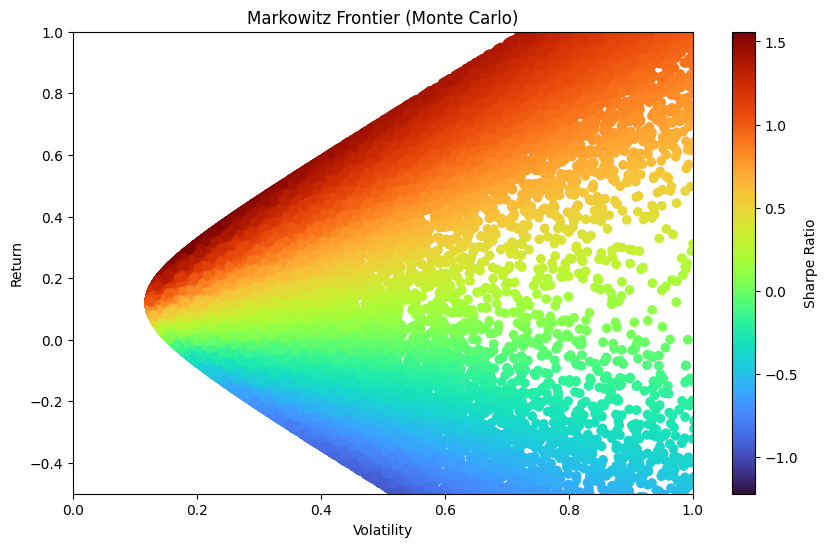

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='turbo')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Markowitz Frontier (Monte Carlo)')

# Zoom
plt.xlim(0, 1.0) 
plt.ylim(-0.5, 1.0)

plt.show()

In [24]:
max_idx = sharpe_arr.argmax() 
min_vol = vol_arr.argmin()

print("TOP PORTFOLIO RESULTS:")
print(f"Return: {ret_arr[max_idx]:.4f}")
print(f"Volatility: {vol_arr[max_idx]:.4f}")
print(f"Sharpe Ratio: {sharpe_arr[max_idx]:.4f}")
print("\nWEIGHTS:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {all_weights[max_idx, i]*100:.2f}%")

TOP PORTFOLIO RESULTS:
Return: 0.3108
Volatility: 0.1994
Sharpe Ratio: 1.5587

WEIGHTS:
GLD: 90.24%
NVDA: 35.26%
^GSPC: -25.50%


In [25]:
print("SAFEST PORTFOLIO RESULTS")
print(f"Return: {ret_arr[min_vol]:.4f}")
print(f"Volatility: {vol_arr[min_vol]:.4f}")
print(f"Sharpe Ratio: {sharpe_arr[min_vol]:.4f}")
print(f"\nWEIGHTS:")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {all_weights[min_vol, i]*100:.2f}%")

SAFEST PORTFOLIO RESULTS
Return: 0.1193
Volatility: 0.1235
Sharpe Ratio: 0.9657

WEIGHTS:
GLD: 58.99%
NVDA: -8.26%
^GSPC: 49.27%
